In [57]:
import cv2
import numpy as np

def deteksi_plat(image_path):
    # Load image
    image = cv2.imread(image_path)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform edge detection
    edges = cv2.Canny(gray, 100, 200)
    
    # Find contours of the potential license plate regions
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours based on area and aspect ratio
    min_area = 500  # Minimum area of a contour to be considered as a license plate
    min_aspect_ratio = 2  # Minimum aspect ratio of a contour to be considered as a license plate
    
    candidate_plates = []
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        area = cv2.contourArea(contour)
        
        if area > min_area and aspect_ratio > min_aspect_ratio:
            candidate_plates.append(contour)
            
    # Sort candidate plates by size in descending order
    candidate_plates = sorted(candidate_plates, key=cv2.contourArea, reverse=True)
    
    if len(candidate_plates) > 0:
        # Select the largest candidate plate
        largest_plate = candidate_plates[0]
        
        # Draw a bounding rectangle around the plate
        x, y, w, h = cv2.boundingRect(largest_plate)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Apply perspective transform to zoom into the plate
        src_pts = np.float32([[x, y], [x + w, y], [x, y + h], [x + w, y + h]])
        dst_pts = np.float32([[0, 0], [300, 0], [0, 100], [300, 100]])  # Destination points for perspective transform
        
        matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
        result = cv2.warpPerspective(image, matrix, (300, 100))
        
        cv2.imshow("Detected License Plate", result)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        
        edges = cv2.Canny(result,50,255,L2gradient=False)
        
        
        gray_result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
        _, binary_result = cv2.threshold(gray_result, 127, 255, cv2.THRESH_BINARY)
        cv2.imshow("", binary_result)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
        cv2.imwrite("gamgar setelah di crop1.png", result)
        cv2.imwrite("gamgar setelah di crop2.png", edges)
        
        # Create a figure with three subplots
        fig,axes = plt.subplots(1,3,figsize=(15,11))
        ax = axes.ravel()

        ax[0].imshow(result,cmap="gray")
        ax[0].set_title("croping")
        ax[1].imshow(binary_result,cmap="gray")
        ax[1].set_title("binary")
        ax[2].imshow(edges,cmap="gray")
        ax[2].set_title("canny")
    else:
        print("No license plate found.")


In [3]:
image = "image/mobil-mau-pakai-plat-nomor-cantik-segini-kisaran-harganya-tda.jpg"

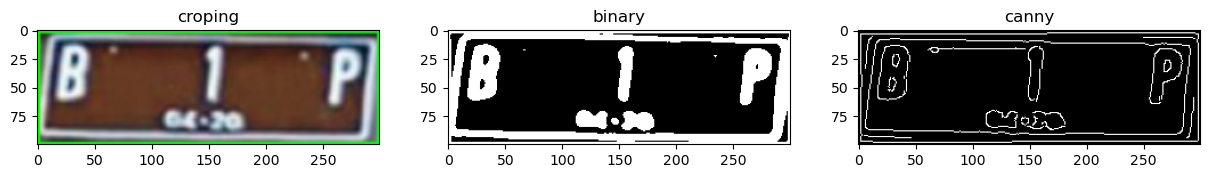

In [59]:
deteksi_plat(image)

In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import cv2

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def deteksi_plat1(image_path):
    # Load image
    image = cv2.imread(image_path)
    
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Perform edge detection
    edges = cv2.Canny(gray, 100, 200)
    
    # Find contours of the potential license plate regions
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Filter contours based on area and aspect ratio
    min_area = 500  # Minimum area of a contour to be considered as a license plate
    min_aspect_ratio = 2  # Minimum aspect ratio of a contour to be considered as a license plate
    
    candidate_plates = []
    
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        aspect_ratio = w / float(h)
        area = cv2.contourArea(contour)
        
        if area > min_area and aspect_ratio > min_aspect_ratio:
            candidate_plates.append(contour)
            
    # Sort candidate plates by size in descending order
    candidate_plates = sorted(candidate_plates, key=cv2.contourArea, reverse=True)
    
    if len(candidate_plates) > 0:
        # Select the largest candidate plate
        largest_plate = candidate_plates[0]
        
        # Draw a bounding rectangle around the plate
        x, y, w, h = cv2.boundingRect(largest_plate)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        
        # Apply perspective transform to zoom into the plate
        src_pts = np.float32([[x, y], [x + w, y], [x, y + h], [x + w, y + h]])
        dst_pts = np.float32([[0, 0], [300, 0], [0, 100], [300, 100]])  # Destination points for perspective transform
        
        matrix = cv2.getPerspectiveTransform(src_pts, dst_pts)
        result = cv2.warpPerspective(image, matrix, (300, 100))
        
        edges = cv2.Canny(result, 50, 255, L2gradient=False)
        
        gray_result = cv2.cvtColor(result, cv2.COLOR_BGR2GRAY)
        _, binary_result = cv2.threshold(gray_result, 127, 255, cv2.THRESH_BINARY)
        
        # Create a figure with four subplots
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        ax = axes.ravel()

        # Original image
        ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax[0].set_title("gambar asli")

        # Detected license plate
        ax[1].imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        ax[1].set_title("Plat terdeteksi")

        # Binary image
        ax[2].imshow(binary_result, cmap='gray')
        ax[2].set_title("Binary Image")

        # Edges image
        ax[3].imshow(edges, cmap='gray')
        ax[3].set_title("Edges Image")

        plt.tight_layout()
        plt.show()
    else:
        print("No license plate found.")



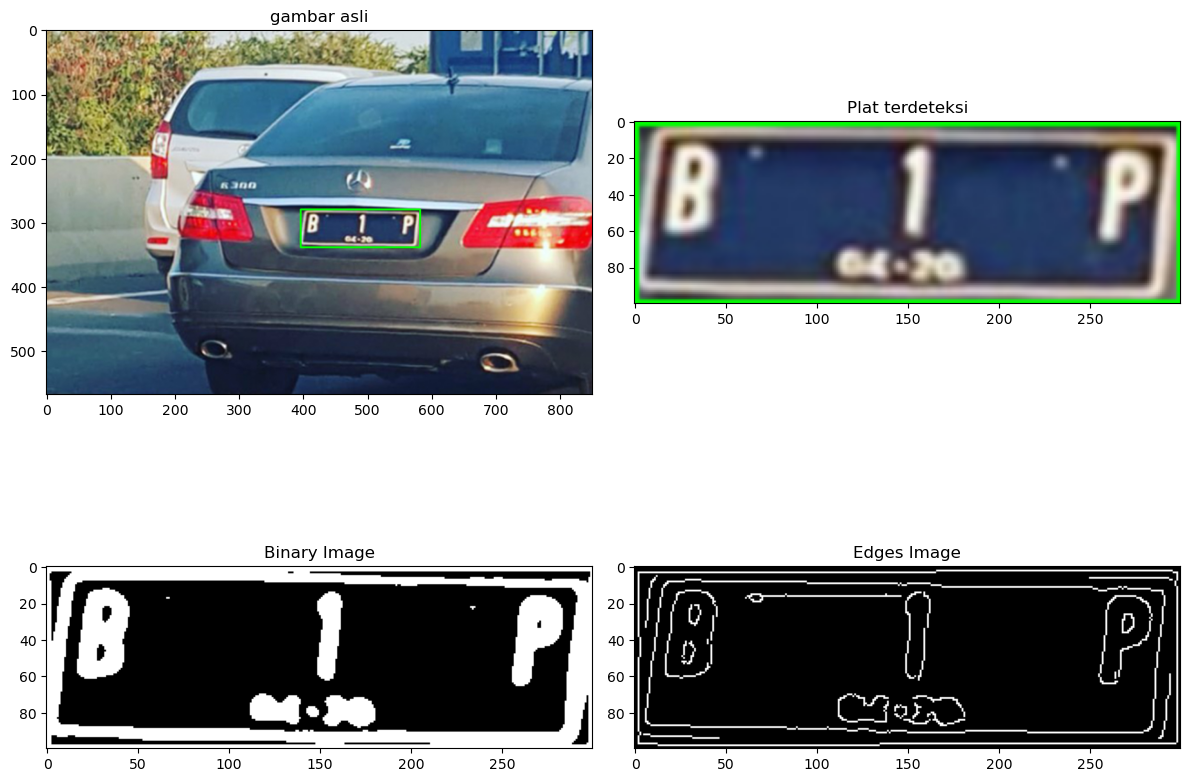

In [8]:
deteksi_plat1(image)